## What factors contribute to lower rates of adolescent maternal mortality long-term?

The following methods consist of: Random Forest Classifier, KNeighbors Classifier, Logistic Regression, and Gaussian Naive Bayes.  For the interpretation of differences between individual parameters of the mothers in two classes predicted failure (maternal mortality) verses prediction success (maternal vitality), the problem of classification via using the decision tree can be solved. The target is prediction failure class.

Target Variable - Percent Above(0) and Below(1) μ Population Age of Maternal Mortality - Binary Linear Regression

In [1]:
# Import the relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

# Machine Learning modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix

# ROC Curve
from sklearn.metrics import roc_curve

# Error Handling for Random Forest Tree
from sklearn import preprocessing
from sklearn import utils

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Open merged materna_mortal_factors dataset
%store -r metro_gdp_mortality

In [3]:
data = metro_gdp_mortality
data.head()

,State,State Population 2015,State GDP 2015,μ Age Maternal Mortality,Above(0)/Below(1) μ Pop Age,μ Age Variance,Total Maternal Mortality (n),μ Age Adolescent Maternal Mortality,μ Age Adolescent Variance,Adolescent Maternal Mortality (n),Total Percent Maternal Mortality 2015,Adolescent Percent Maternal Mortality 2015
0,Aguascalientes,1044049,19528.0,28.36,0,55.16,127,18.08,2.55,25,0.0122,0.0024
1,Baja California,3315766,57136.0,27.15,1,46.31,361,18.00,2.70,69,0.0109,0.0008
4,Baja California Sur,272711,21431.0,27.56,1,55.37,66,18.00,3.25,16,0.0242,0.0092
5,Campeche,283025,NaN,26.87,1,44.29,126,18.00,4.18,22,0.0445,0.0088
6,Chiapas,1162592,13392.0,28.02,1,45.02,1235,18.33,2.57,52,0.1062,0.0022


### Dataset Target Variable: Above(0) and Below(1) μ Population Age of Maternal Mortality

#### Assess potential correlation of various factors within each Region
- Create a correlation dataframe
- Plot the correlation dataframe on a sns heatmap:
    - Cells that are in green show positive correlation
    - Cells that are in red show negative correlation

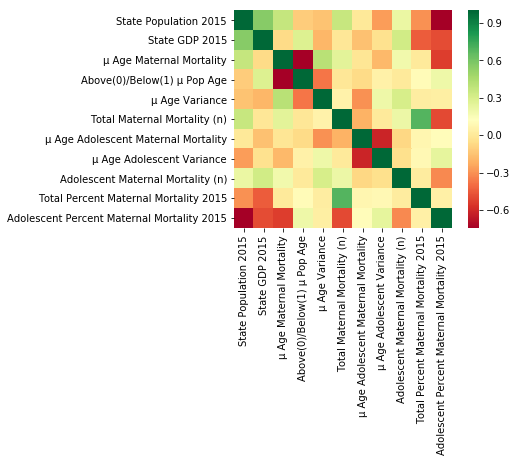

In [4]:
# Create a correlation dataframe
feature_corr = data.corr()

# Plot a correlation heatmap
sns.heatmap(feature_corr, square=True, cmap='RdYlGn')

#### *Preliminary Observations of Interest*: 
- **Positive (+) Correlation**
    - State Population
        - State GDP
        - μ Age Maternal Mortality
        - Total Maternal Mortality (n)
    - State GDP
        - Above(0)/Below(1) μ Pop Age
        - Adolescent Maternal Mortality (n)
- **Negative (-) Correlation**
    - Adolescent Percent Maternal Mortality
        - State Population
        - State GDP
        - Total Maternal Mortality (n)

#### ( + ) Correlation: State Population and GDP 

Text(0.5,1,'Relationship between State Population and GDP')

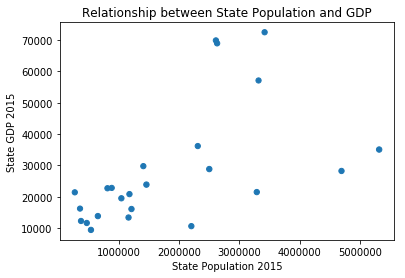

In [5]:
plt.scatter(data['State Population 2015'], data['State GDP 2015'], s=data['μ Age Maternal Mortality'])
plt.xlabel("State Population 2015")
plt.ylabel("State GDP 2015")
plt.title("Relationship between State Population and GDP")

#### ( + ) Correlation: Above(0)/Below(1) μ Age of Maternal Mortality in Mexico with State GDP

Text(0.5,1,'Relationship between μ Age of Maternal Mortality and State GDP')

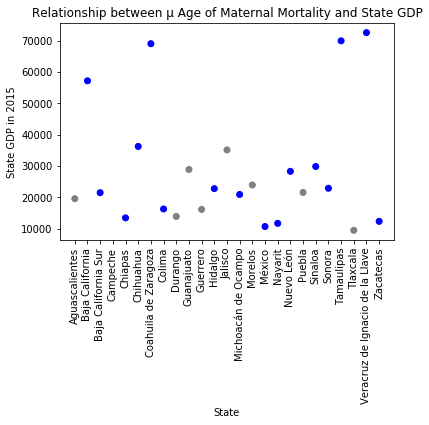

In [9]:
cols = {0: 'grey', 1: 'blue'}
labels = ['Above', 'Below']
plt.scatter(x=data['State'], 
            y=data['State GDP 2015'], 
            c=data['Above(0)/Below(1) μ Pop Age'].map(cols),
            label=labels)

# label axes and title
plt.xlabel("State")
plt.xticks(rotation='vertical')
plt.ylabel("State GDP in 2015")
plt.title("Relationship between μ Age of Maternal Mortality and State GDP")

#### Purpose for Changing all Categorical Strings to a Numeric Value: 
- Machine Learning models will ignore string values (strings have no statistical value unless added)
- Numeric values are comparable therefore string values should be categorically changed to numbers
- This is how you compare a string value to a numeric value that the model can use

In [10]:
# Convert Column value strings to a numeric value
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [11]:
data.head()

,State,State Population 2015,State GDP 2015,μ Age Maternal Mortality,Above(0)/Below(1) μ Pop Age,μ Age Variance,Total Maternal Mortality (n),μ Age Adolescent Maternal Mortality,μ Age Adolescent Variance,Adolescent Maternal Mortality (n),Total Percent Maternal Mortality 2015,Adolescent Percent Maternal Mortality 2015
0,0,1044049,19528.0,28.36,0,55.16,127,18.08,2.55,25,0.0122,0.0024
1,1,3315766,57136.0,27.15,1,46.31,361,18.00,2.70,69,0.0109,0.0008
4,2,272711,21431.0,27.56,1,55.37,66,18.00,3.25,16,0.0242,0.0092
5,3,283025,22120.5,26.87,1,44.29,126,18.00,4.18,22,0.0445,0.0088
6,4,1162592,13392.0,28.02,1,45.02,1235,18.33,2.57,52,0.1062,0.0022


## Basic Logistic Regression:

* Split the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

#### Test-Train-Split:
- X = copy of all features and the response variable of dataset
- y = all features within dataset *excluding the response (target) variable*
- test_size = represents the proportion of the dataset (as a percentage) to include in the test split
- random_state = the seed used by the random number generator

In [12]:
# Entire dataset (even with response variable)
X = data.copy()

# The response variable
y = data.copy().pop('Above(0)/Below(1) μ Pop Age')

In [13]:
# Create train and test data sets with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=5)
len(X_train), len(X_test), len(y_train), len(y_test)

(18, 7, 18, 7)

In [14]:
# Create a Logistic Regression Incidence 
clf_log = LogisticRegression()

# Fit clf_log to training data
clf_log.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(accuracy_score(clf_log.predict(X_test), y_test))

0.7142857142857143


#### Tuning the Model

Since the resulting accuracy score was low (~71.43% accurate)

#### A. K-fold cross-validation

In [15]:
# Create a function function to perform K-fold cross-validation 
#and apply a scoring function to each test fold. 

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    
    # split data into train/test groups, 5 times
    for train, test in KFold(nfold).split(x):
        
        # fit training data
        clf.fit(x[train], y[train])
        
        # evaluate score function on held-out data
        result += score_func(clf.predict(x[test]), y[test])
        
          # average
    return result / nfold 

In [16]:
score = cv_score(clf_log, X_train, y_train)
score

0.6

#### B. GridSearchCV

In [17]:
# calculate best 'C' with GridSearchCV
def cv_optimize(clf, parameters, X_train, y_train, n_folds=5):
    
    #Use GridSearchCV to find the best C parameter
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X_train, y_train)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

#### C. TrainTestSplit with CV Optimizer

In [20]:
#Define a parameter range
parameters = {"C": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

#Apply cv_optimize function to Logistic Regression
clf = cv_optimize(clf_log, parameters, X_train, y_train)
    
#Fit to training data
clf = clf.fit(X_train, y_train)
    
#Assess model accuracy (train and test)
training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))

BEST PARAMS {'C': 0.0001}
Accuracy on training data: 0.83
Accuracy on test data:     0.71


#### Plot Data

In [21]:
clf.predict_proba(X_test)

array([[1.28088799e-01, 8.71911201e-01],
       [9.98138603e-01, 1.86139659e-03],
       [1.35368050e-02, 9.86463195e-01],
       [8.96174541e-02, 9.10382546e-01],
       [6.05898588e-04, 9.99394101e-01],
       [9.99999420e-01, 5.79515565e-07],
       [1.28067758e-01, 8.71932242e-01]])

#### For Random Forest Classifiers:
- n_estimators: choosing 100 is a straight forward value
- max_depth: the level of complexity/freedom - values 2 to 6 is usually fine, though starting at 2 is recommended
- random_state: the seed for the random number generator - makes a model replicatable - any number is fine

In [22]:
# Create a Random Forest Classifier incidence 
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [23]:
# Fit train data to Random Forest Classifier
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
# Compute the confusion_matrix to evaluate the accuracy of a classification
conf_matrix = confusion_matrix(y_test, rfc_model.predict(X_test))
conf_matrix 

array([[2, 0],
       [0, 5]])

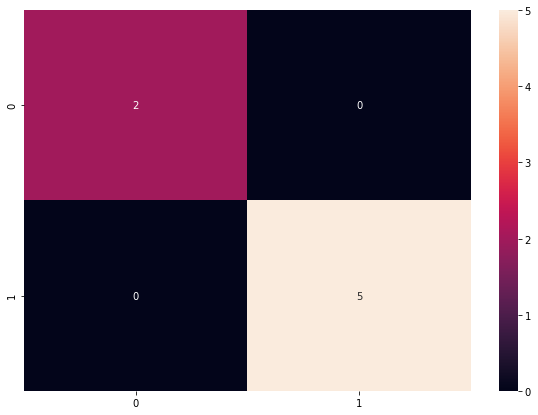

In [25]:
# Plot confusion_matrix
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True)

#### Compute the Root Mean Squared Error (RMSE) 
- Used measure of the differences between values predicted by a model and the values observed 
- RMSE is always non-negative
- A value of 0 would indicate a perfect fit to the data. 
In general, a lower RMSD is better than a higher one. 

In [109]:
# Predict on the test data: y_pred
y_pred_lin = clf_lin.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(clf_lin.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("Root Mean Squared Error (RMSE): {}".format(rmse))

R^2: -13.759755192907654
Root Mean Squared Error (RMSE): 9.919595150645902


In [ ]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(clf_lin, X, y, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

# Coefficient
clf_coef = clf_lin.coef_
print('Correlation Coefficients: ', clf_coef)

# Intercept
clf_int = clf_lin.intercept_
print('Linear Regression Intercept: ', clf_int)

In [57]:
# Plot outputs
plt.scatter(X, y_scores_encoded,  color='black')
plt.plot(X_test, y_pred_lin, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### K-Neighbors Classification
- Supervised neighbors classification for data with discrete labels

In [27]:
# Define features
features = list(data.keys())[:-1]
features

['State',
 'State Population 2015',
 'State GDP 2015',
 'μ Age Maternal Mortality',
 'Above(0)/Below(1) μ Pop Age',
 'μ Age Variance',
 'Total Maternal Mortality (n)',
 'μ Age Adolescent Maternal Mortality',
 'μ Age Adolescent Variance',
 'Adolescent Maternal Mortality (n)',
 'Total Percent Maternal Mortality 2015']

In [29]:
# Define number of K-Neighbors
neighbors = 8
knn = KNeighborsClassifier(neighbors)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred_knn = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[1 1]
 [0 5]]
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       0.83      1.00      0.91         5

avg / total       0.88      0.86      0.84         7



In [90]:
# Fix Error 'continuous' variable
lab_enc = preprocessing.LabelEncoder()

# Transform y data to not be 'continuous'
y_encoded = lab_enc.fit_transform(y)

# Transform y_train data to not be 'continuous'
y_train_encoded = lab_enc.fit_transform(y_train)

# Transform y_test data to not be 'continuous'
y_test_encoded = lab_enc.fit_transform(y_test)

# Verify Output
print('Training Y Data')
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded ))
print('...')
print('Testing Y Data')
print(testing_scores_encoded)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(y_test_encoded ))
len(y_train_encoded), len(y_test_encoded)

Training Y Data
[ 8  7  4 14 11 15 10  0  3  9 12  2 13  5  6  1]
binary
binary
binary
...
Testing Y Data
[6 4 1 5 7 2 8 0 3]
binary
binary
binary


(18, 7)